In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"D:\Road to Data Science\DataSets Given In Class\Titanic.csv.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [10]:
df['Cabin_null'].value_counts()

1    687
0    204
Name: Cabin_null, dtype: int64

In [11]:
df['Cabin_null'].mean()

0.7710437710437711

In [12]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

In [13]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1


# Mean,Median Imputation

# We replace NAN values with median or node of that feature

In [14]:
df1=pd.read_csv(r"D:\Road to Data Science\DataSets Given In Class\Titanic.csv.csv",usecols=["Fare","Survived","Age"])
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
 median=df.Age.median()
median

28.0

In [16]:
df1['Age_Median']=df1['Age'].fillna(median)

In [17]:
df1

,Survived,Age,Fare,Age_Median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


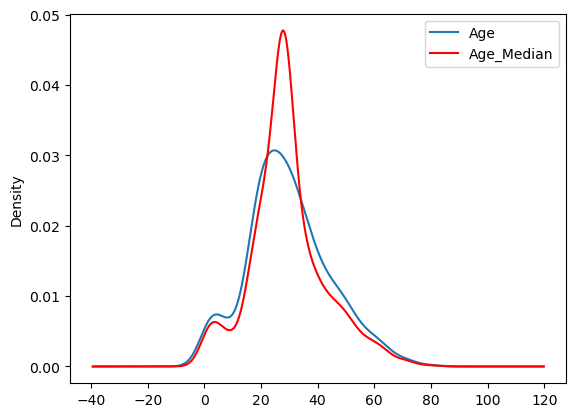

In [18]:
figure=plt.figure()
ax=figure.add_subplot(1,1,1)
df['Age'].plot(kind='kde',ax=ax)
df1['Age_Median'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


##### We find that there is a distortion of variance when we apply mean,median imputation and definetly change in co relation.


# Random Sample Imputation

# Random Sample Imputation is filling the NAN values in dataset with random observations.


In [19]:
import pandas as pd
df=pd.read_csv(r"D:\Road to Data Science\DataSets Given In Class\Titanic.csv.csv",usecols=["Fare","Survived","Age"])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [20]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [21]:
df[df["Age"].isnull()]

,Survived,Age,Fare
5,0,NaN,8.4583
17,1,NaN,13.0000
19,1,NaN,7.2250
26,0,NaN,7.2250
28,1,NaN,7.8792
...,...,...,...
859,0,NaN,7.2292
863,0,NaN,69.5500
868,0,NaN,9.5000
878,0,NaN,7.8958


In [27]:
df.at[423,'Age']

28.0

In [24]:
random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [28]:
def impute_nan(df,var,median):
    df[var+"_median"]=df[var].fillna(median)
    df[var+"_random"]=df[var]
    random_sample=df[var].dropna().sample(df[var].isnull().sum(),random_state=0)
    random_sample.index=df[df[var].isnull()].index
    df.loc[df[var].isnull(),var+"_random"]=random_sample
    median=df.Age.median()
impute_nan(df,"Age",median)

In [29]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


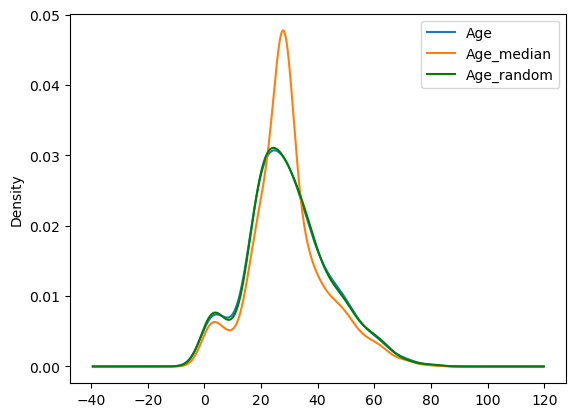

In [42]:
figure=plt.figure()
ax=figure.add_subplot(1,1,1)
df['Age'].plot(kind='kde',ax=ax)
df["Age_median"].plot(kind='kde',ax=ax)
df['Age_random'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


# Advantages of Random Sample Computation
# 1> Easy to implement
# 2> There is less distoration in variance
# Disadvantages
# 1> every situation randomness wont work

# Capturing Nan with new features

# This situation works when data is missing not at random

In [46]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)

In [47]:
df

,Survived,Age,Fare,Age_median,Age_random,Age_nan
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0
...,...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0,0
887,1,19.0,30.0000,19.0,19.0,0
888,0,NaN,23.4500,28.0,15.0,1
889,1,26.0,30.0000,26.0,26.0,0


In [48]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [53]:
df.head()

,Survived,Age,Fare,Age_median,Age_random,Age_nan
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0


# Advantages
# 1> Captures the importance of missingness
# 2> Easy to implement
# Disadvantages
# 1> Creates additional features which is a curse of dimensionality


# End of Distribution Imputation

In [69]:
df=pd.read_csv(r"D:\Road to Data Science\DataSets Given In Class\Titanic.csv.csv",usecols=["Fare","Survived","Age"])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [82]:
median=df.Age.median()
extreme=df.Age.mean()+3*df.Age.std()
def impute_nan(df,var,median,extreme):
    df[var+"_median"]=df[var].fillna(median)
    df[var+"_extreme"]=df[var].fillna(extreme)
impute_nan(df,"Age",median,extreme)

In [83]:
df

,Survived,Age,Fare,Age_median,Age_extreme
0,0,22.0,7.2500,22.0,22.00000
1,1,38.0,71.2833,38.0,38.00000
2,1,26.0,7.9250,26.0,26.00000
3,1,35.0,53.1000,35.0,35.00000
4,0,35.0,8.0500,35.0,35.00000
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.00000
887,1,19.0,30.0000,19.0,19.00000
888,0,NaN,23.4500,28.0,73.27861
889,1,26.0,30.0000,26.0,26.00000


C:\Users\souvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_median'>

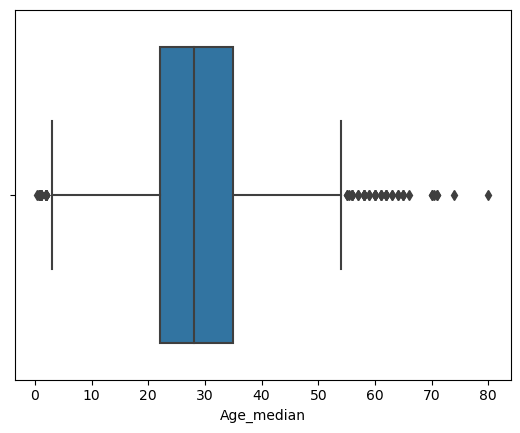

In [84]:
import seaborn as sns
sns.boxplot(df["Age_median"])

C:\Users\souvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_extreme'>

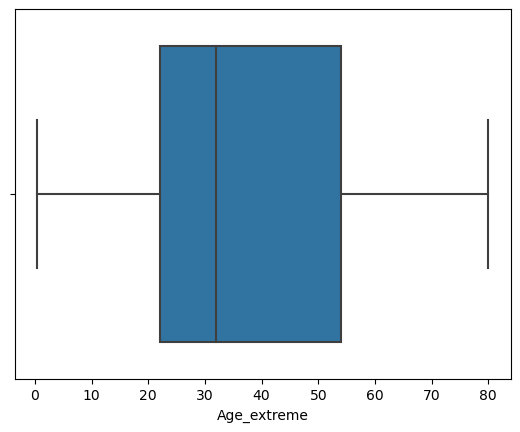

In [85]:
sns.boxplot(df["Age_extreme"])

# Arbitary Imputataion

In [86]:
df=pd.read_csv(r"D:\Road to Data Science\DataSets Given In Class\Titanic.csv.csv",usecols=["Fare","Survived","Age"])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

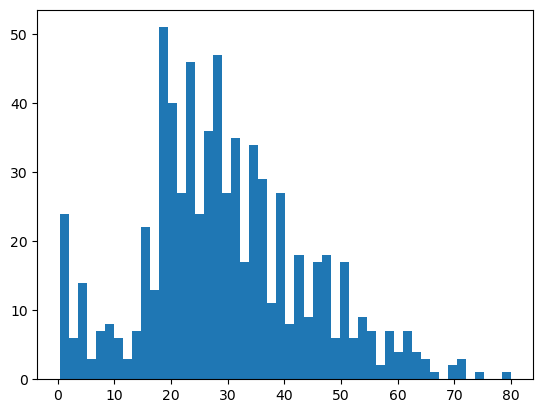

In [88]:
plt.hist(df["Age"],bins=50)

In [89]:
def impute_nan(df,var):
    df[var+"_100"]=df[var].fillna(100)
    df[var+"_0"]=df[var].fillna(0)
impute_nan(df,"Age")

In [90]:
df

,Survived,Age,Fare,Age_100,Age_0
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,100.0,0.0
889,1,26.0,30.0000,26.0,26.0


##### Handling Categorical features

In [107]:
data=pd.read_csv("Loan.csv.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [108]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [109]:
data=pd.read_csv("Loan.csv.csv",usecols=['FireplaceQu','BsmtQual','GarageType','SalePrice'])
data

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [110]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

##### Replace NAN values with most frequent occuring categories

<AxesSubplot:>

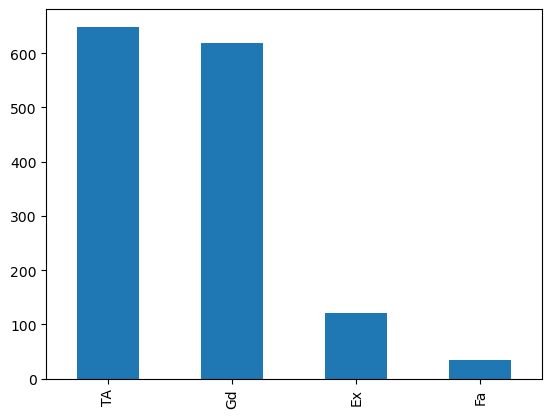

In [112]:
data['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

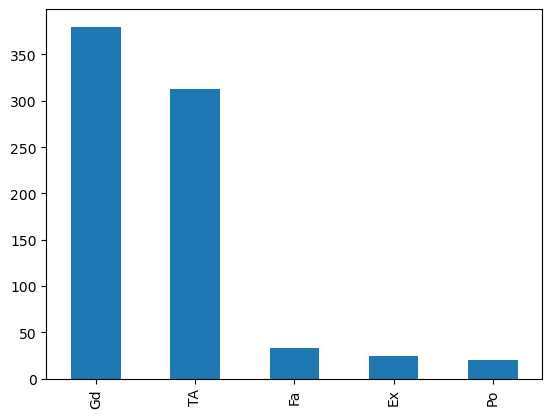

In [113]:
data['FireplaceQu'].value_counts().plot.bar()

<AxesSubplot:>

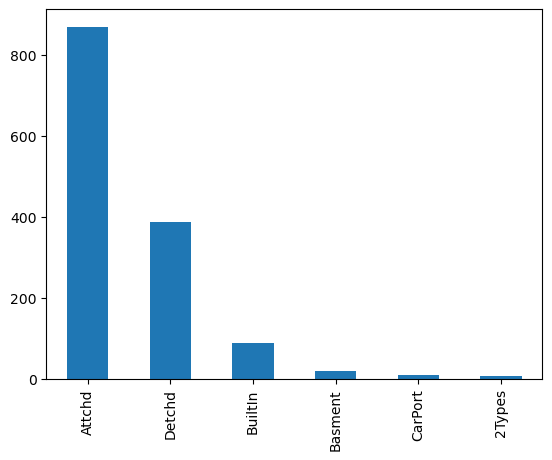

In [114]:
data['GarageType'].value_counts().plot.bar()

In [115]:
data['BsmtQual'].value_counts().index[0]

'TA'

In [119]:
data['BsmtQual'].fillna('TA',inplace=True)

In [120]:
data['BsmtQual'].isnull().mean()

0.0

In [121]:
data['GarageType'].fillna('Attchd',inplace=True)

In [122]:
data['GarageType'].isnull().mean()

0.0

In [124]:
data['FireplaceQu'].fillna('Gd',inplace=True)

In [128]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,0,Gd,Attchd,208500
1,0,TA,Attchd,181500
2,0,TA,Attchd,223500
3,0,Gd,Detchd,140000
4,0,TA,Attchd,250000


#### Adding a variable to capture NAN

In [19]:
data=pd.read_csv("Loan.csv.csv",usecols=['BsmtQual','FireplaceQu','GarageType'])
data

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd
...,...,...,...
1455,Gd,TA,Attchd
1456,Gd,TA,Attchd
1457,TA,Gd,Attchd
1458,TA,NaN,Attchd


In [20]:
def impute_nan(data,var):
    data[var]=np.where(data[var].isnull(),1,0)
    

In [21]:
 for feature in ['BsmtQual','FireplaceQu','GarageType']:
        impute_nan(data,feature)

In [22]:
data['BsmtQual'].isnull().mean()

0.0

In [23]:
data['FireplaceQu'].isnull().mean()

0.0

In [24]:
data['GarageType'].isnull().mean()

0.0

#### Change all NAN  to new category

In [29]:
data1=pd.read_csv("Loan.csv.csv",usecols=['BsmtQual','FireplaceQu','GarageType'])
data1

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd
...,...,...,...
1455,Gd,TA,Attchd
1456,Gd,TA,Attchd
1457,TA,Gd,Attchd
1458,TA,NaN,Attchd


In [36]:
def impute_nan(data1,var):
    data1[var]=np.where(data1[var].isnull(),'Missing',data1[var])

In [37]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(data1,feature)


In [38]:
data1

,BsmtQual,FireplaceQu,GarageType
0,Gd,Missing,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd
...,...,...,...
1455,Gd,TA,Attchd
1456,Gd,TA,Attchd
1457,TA,Gd,Attchd
1458,TA,Missing,Attchd
